#UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- Marketing is crucial for the growth and  sustainability of any business
- Marketers can help build the company's brand, engage customers, grow revenue, and increase sales
- growth - marketers empower business growth by reaching new customers
- education - marketers educate and communicate value proposition to customers
- Drive sales - Marketers drive sales and traffic to products/services
- Engagement - Marketers engage customers and understand their needs.

- One of the key pain points for marketers is to know theirs customers and identify their needs.

- by understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs

- if data about the customers is avaliable, data science can be applied to perform market segmentation

- In this case study, you have been hired as a consultant to a bank in New York City
- The bank has extensive data on their customers for the past 6 months
- the marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups

- CUSTID: Identification of credit Card holder
-BALANCE: Balance amount left in customers account to make purchases
-BALANCE_FREQUENCY: How frequently the balance is updated, score between 0 and 1(1 = frequently updated, 0= not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the purchases are beign make, score between 0 and 1 (1 = frequently purchased, 0= not frequently purchased)

- PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1= frequently purchased, 0= not frequently purchased)

- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go(1 = frequently purchased, 0= not frequently purchased)

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0= not frequently done)

- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

- CASH_ADVANCE_TRX: Number of purchase transactions made

- PURCHASES_TRX: Number of purchase transactions made

- CREDIT_LIMIT: Limit of credit Card for user

- PAYMENTS: Amount of oayment done by user

- MINIMUM_PAYMENTS: Minimum amount of payments made by user

- PRC_FULL_PAYMENT: Percent of full payment paid by user

- TENURE: Tenure of credit card service for user


In [ ]:
#import libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
creditcard_df = pd.read_csv('/content/drive/My Drive/datascience/Marketing_data.csv')

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
#let's see who made cash advance of $47127
#This customer made 123 cash advance transactions!
#never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#VISUALIZE AND EXPLORE DATASET


<Axes: >

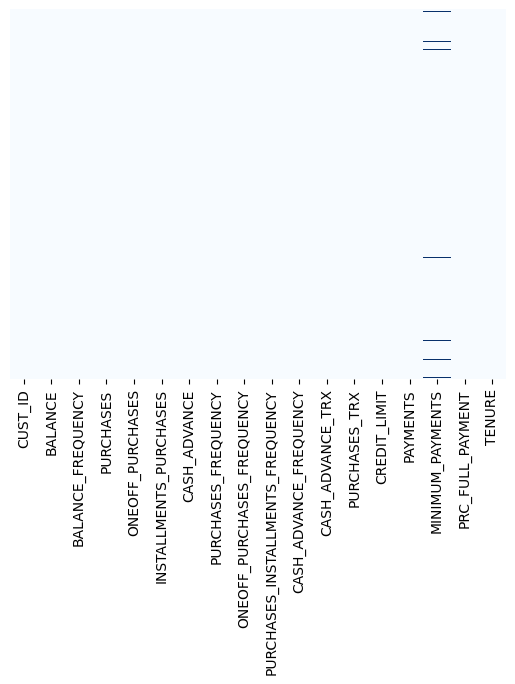

In [ ]:
#let's see if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
#Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

<Axes: >

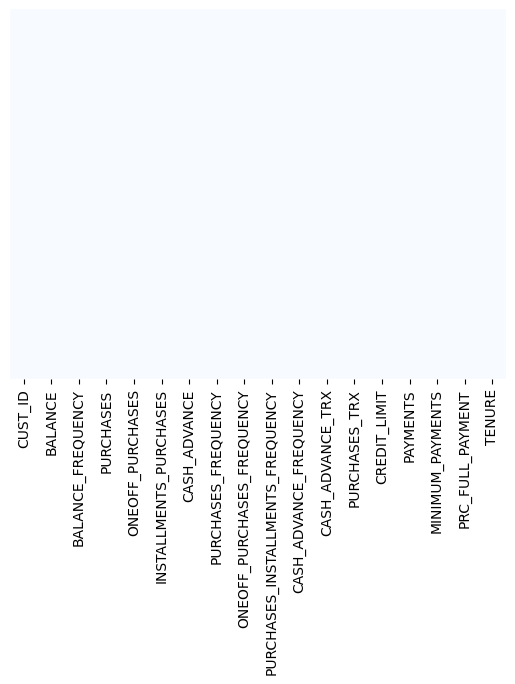

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
#let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
#let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

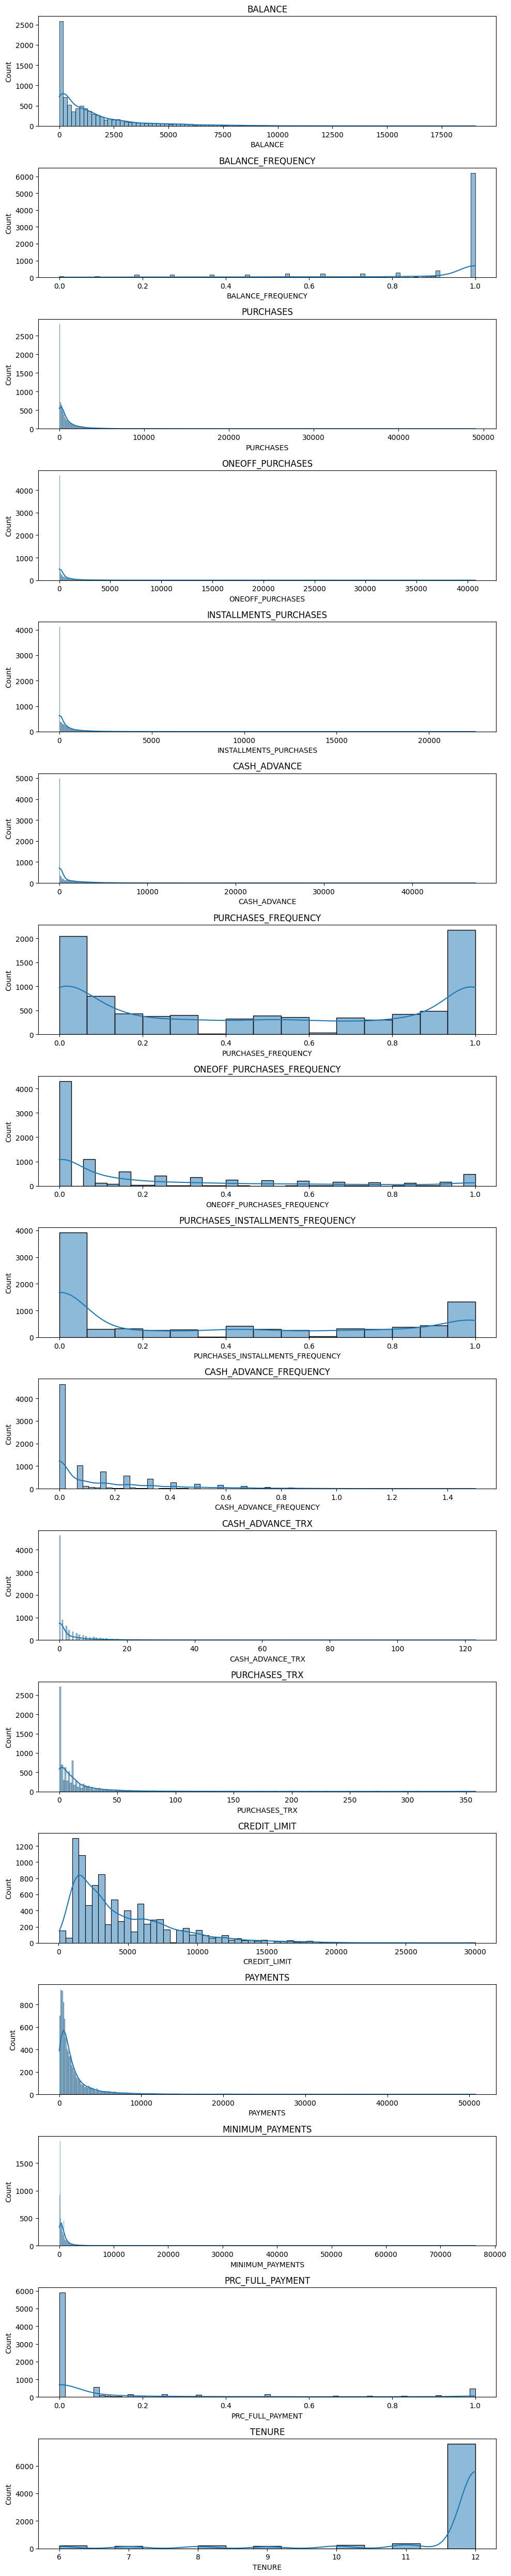

In [ ]:
#distplot combines the matplotlib.hist function with seaborn kdeplot()
#KDE plot represents the Kernel Density Estimate
#KDE is used for visualizing the probability density of a continuous variable
#KDE demonstrates the probability density at different values in a continuous variable

#Mean of balance is $1500
#'Balance_Frequency' for must customers is updated frequently ~1
#For 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' don't do one off purchases or installment purchases frequently
#for 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users dont do one off purchases or installment purchases frequently
#Very small number of customers pay their balance in full 'prc_full_payment' ~0
#credit limit average is aroung $4500
#most customers are ~11 years tenure


plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

Most of the variables show distributions highly concentrated at low frequencies, indicating that the majority of customers do not use these features frequently

- Correlation between 'purchases' and 'oneoff_purchases & 'instalment_purchases'
- Trend between 'Purchases' and 'credit_limit' & 'payments'

In [ ]:
correlations = creditcard_df.corr()

<Axes: >

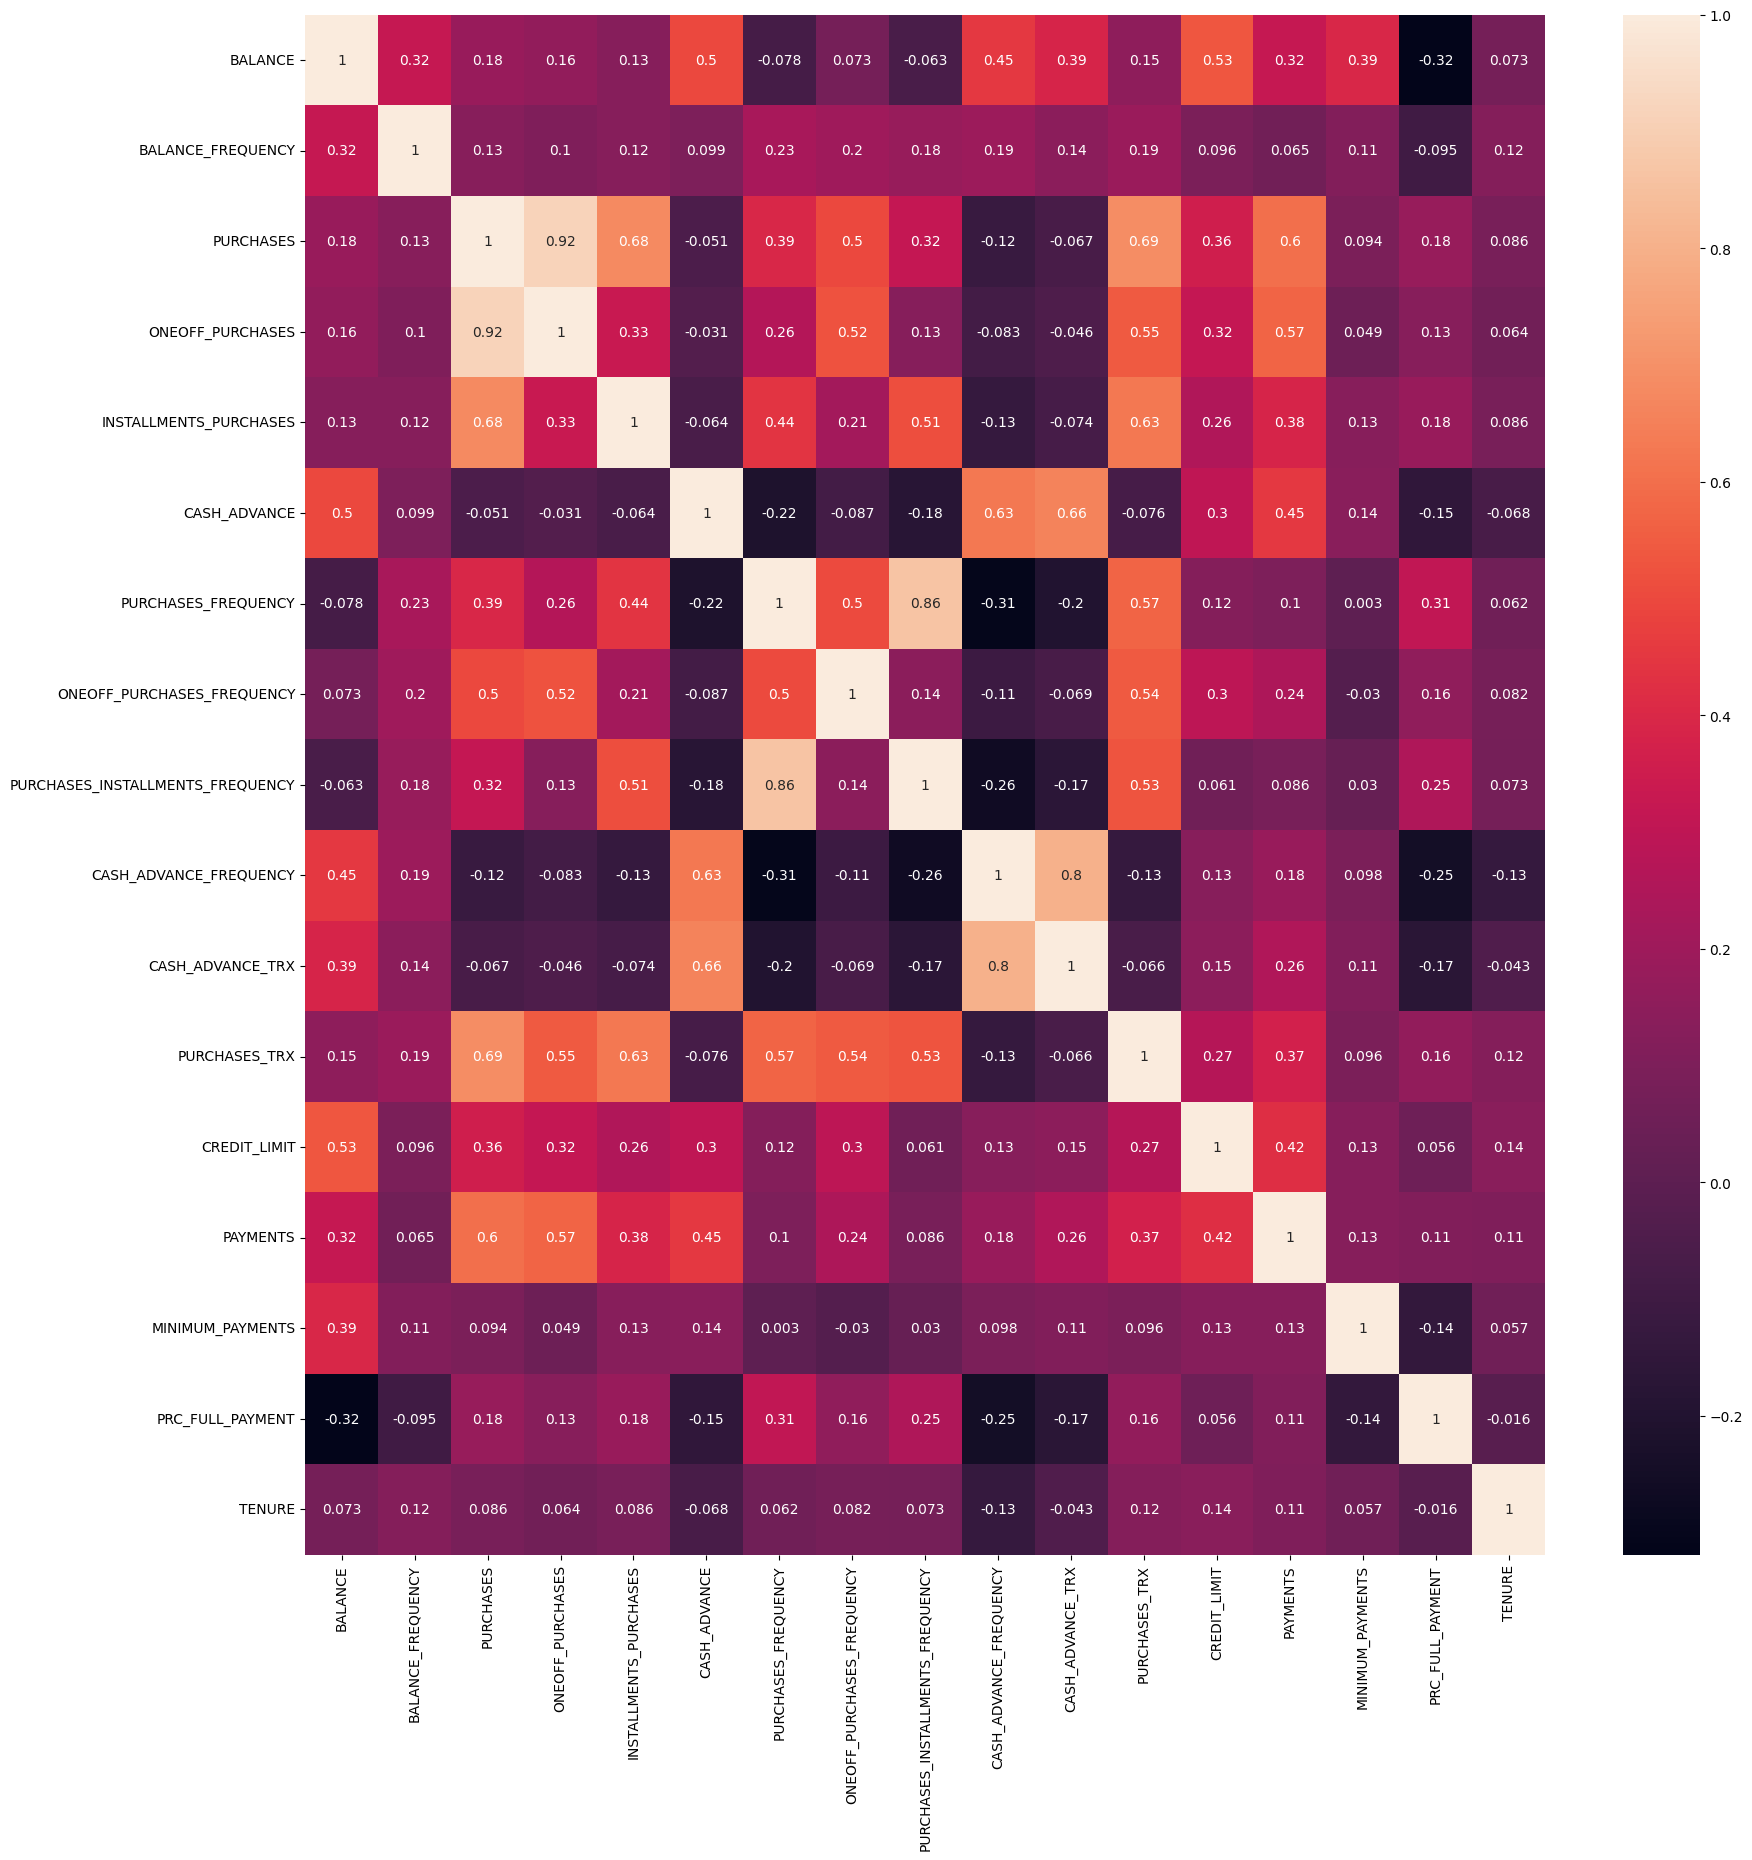

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

#'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments
#Strong positive correlation between 'purchases_frequency' and 'purchases_installment_frequency'

#K-Means
kmeans works by grouping some data point together
- the algorithm groups observations with similar attribute values together by measuring the euclidian distance between points

- Choose number of clusters 'k'
- Select random K points that are going to be the centroids for each cluster
- Assign each data point to the nearest centroid, doing so will enable us to create 'k' number of clusters
- calculate a new centroid for each cluster
- Reassign each data point to the new closest centroid

- elbow method
- if the line chart looks like an arm, then the 'elbow' on the arm is the value of k that is the best


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Import SimpleImputer




# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
creditcard_df_imputed = pd.DataFrame(imputer.fit_transform(creditcard_df), columns=creditcard_df.columns) # Impute missing values and create a new DataFrame

# Now scale the imputed data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df_imputed)


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

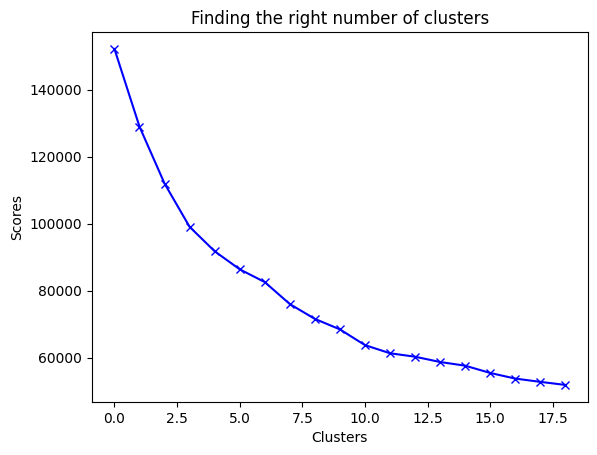

In [ ]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [ ]:
#apply kmeans method
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.713774,-0.469642,-0.099417,-0.252294,0.228006,-0.444275,0.515673,-0.408033,0.632116,-0.643155,-0.456032,-0.058217,-0.104823,-0.213160,-0.297466,2.182719,0.113672
1,-0.189609,-0.211082,-0.352694,-0.234345,-0.403309,-0.159558,-0.863080,-0.398341,-0.766507,-0.060435,-0.127502,-0.487076,-0.298416,-0.241614,-0.090333,-0.410476,0.269717
2,1.101889,0.479101,2.631959,1.893473,2.744747,-0.119092,1.171546,1.578839,1.290116,-0.261691,-0.119932,3.288234,1.341223,1.550345,0.626541,0.252403,0.334668
3,1.595844,0.401313,-0.242470,-0.171416,-0.258461,1.867112,-0.536910,-0.236154,-0.468951,1.840002,1.807735,-0.300437,0.943497,0.725308,0.544149,-0.404224,0.087429
4,-0.335536,-0.462968,-0.294576,-0.209760,-0.310773,0.067515,-0.274357,-0.287551,-0.291775,0.308717,0.000289,-0.401693,-0.560569,-0.393944,-0.201575,-0.107941,-3.172601
5,-0.235515,0.218460,-0.047127,-0.218644,0.290283,-0.327564,0.935822,-0.326785,1.136139,-0.406538,-0.319002,0.189015,-0.293351,-0.205915,0.045110,-0.308294,0.279485
6,-0.089757,0.419328,0.598181,0.725883,0.080621,-0.326002,1.015497,1.968470,0.210231,-0.411446,-0.332134,0.688093,0.494618,0.174413,-0.147541,0.401360,0.281141
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


The output represents the centroids of clusters generated by the K-means algorithm, where:
- Rows: cluster 0, 1
- columns: each column represents a feature (balance, purchases). The values are the mean(normalized) of that feature for the respective cluster
- centroids: show the average behavior of data points in each cluster

- cluster insights:
      -- Cluster 4 has high values for PURCHASES and related features, representing heavy buyers
      -- cluster 5 shows high CASH_ADVANCE usage, indicating frequent cash advances
      --cluster 4 has a low value accross most features, representing low activity
      -- # First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [ ]:
labels.shape #labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

imagine you have a group of customers, and you've used the kmeanss algorithm to divide them into, say, 8 clusters. the labels variable is like a list where each entry corresponds to a customer, and the value of that entry tells you which cluster that customer belongs to 1,2 ,3

If labelsshape return 8950, it means you have 8899 customers in your dataset, and the labels array contains 8960 assignments, one of each customer

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([4, 7, 0, ..., 2, 4, 4], dtype=int32)

In [ ]:
#Concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


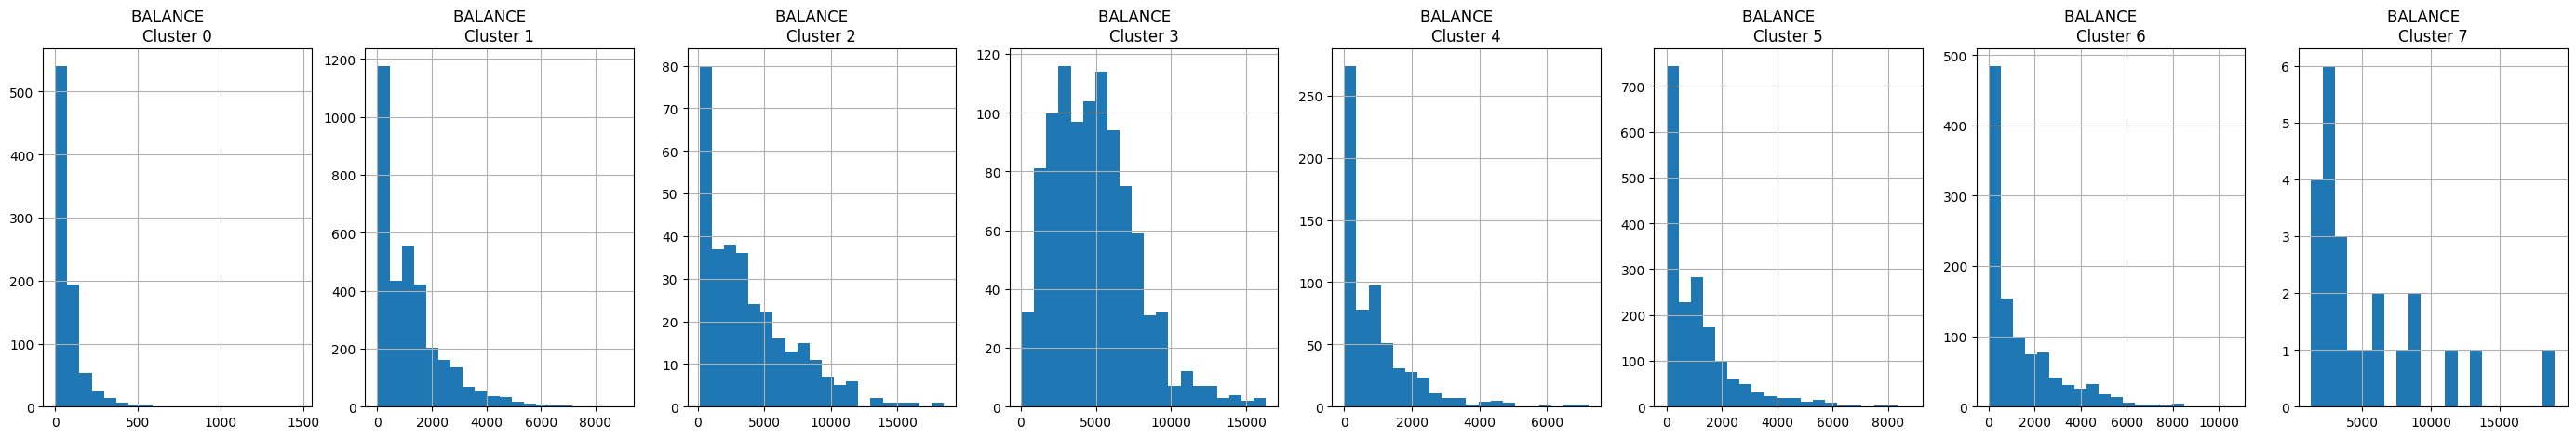

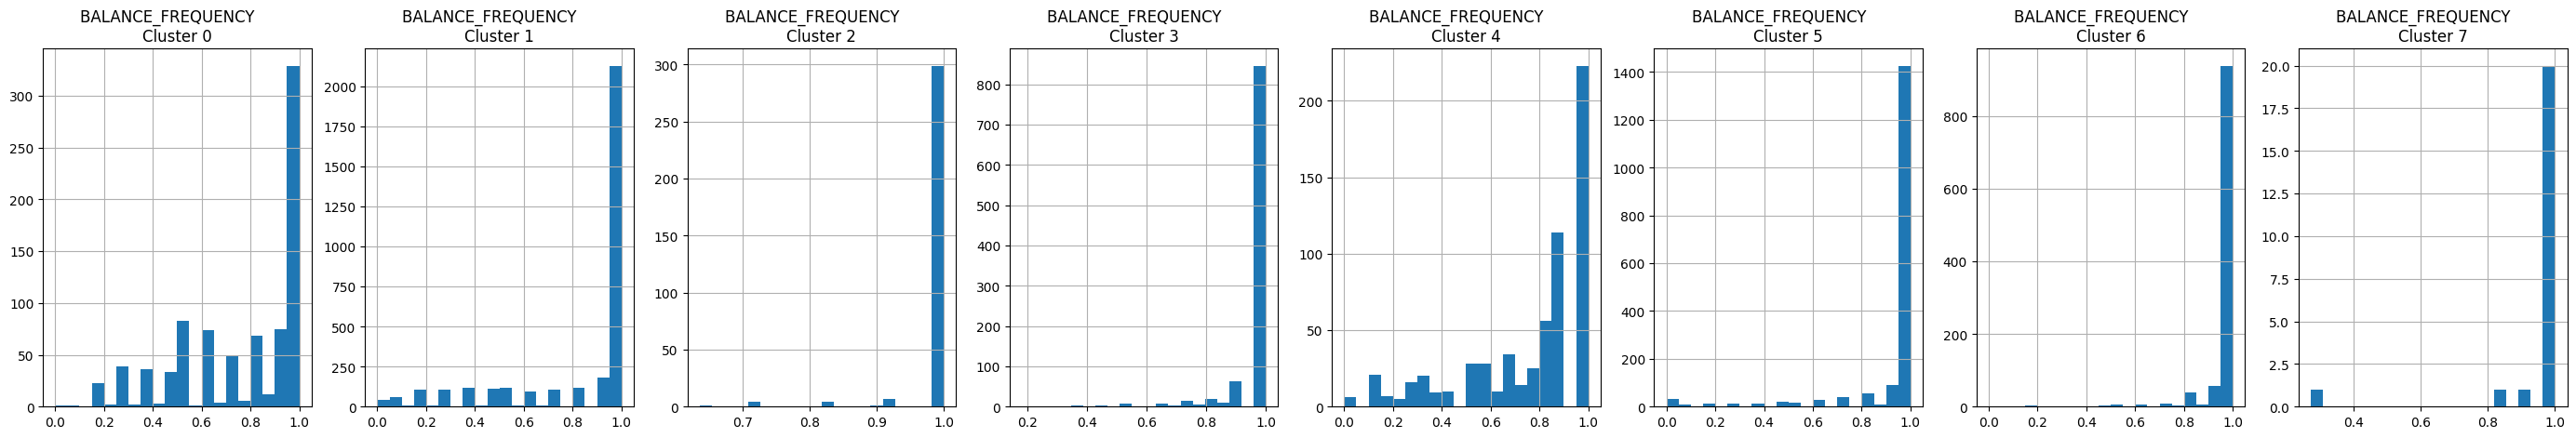

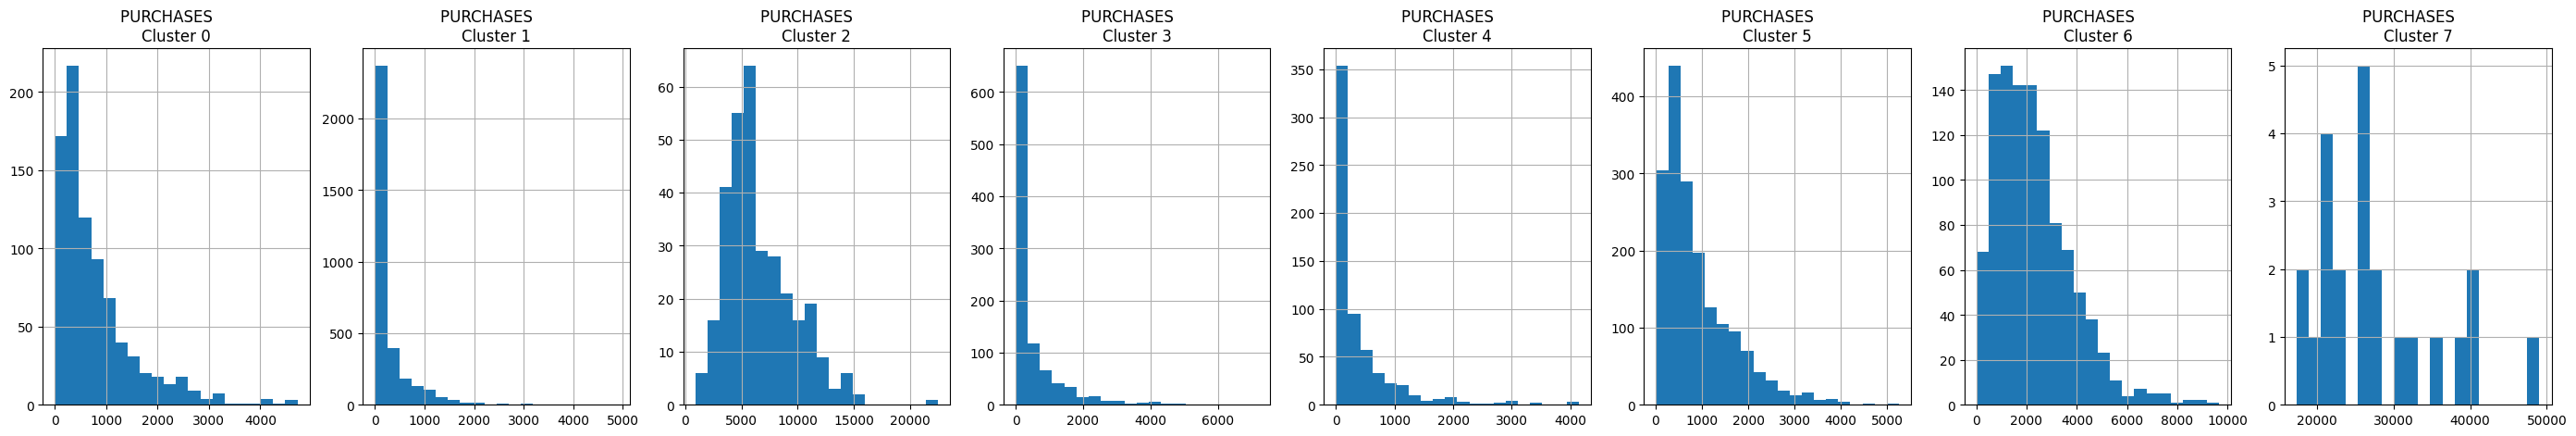

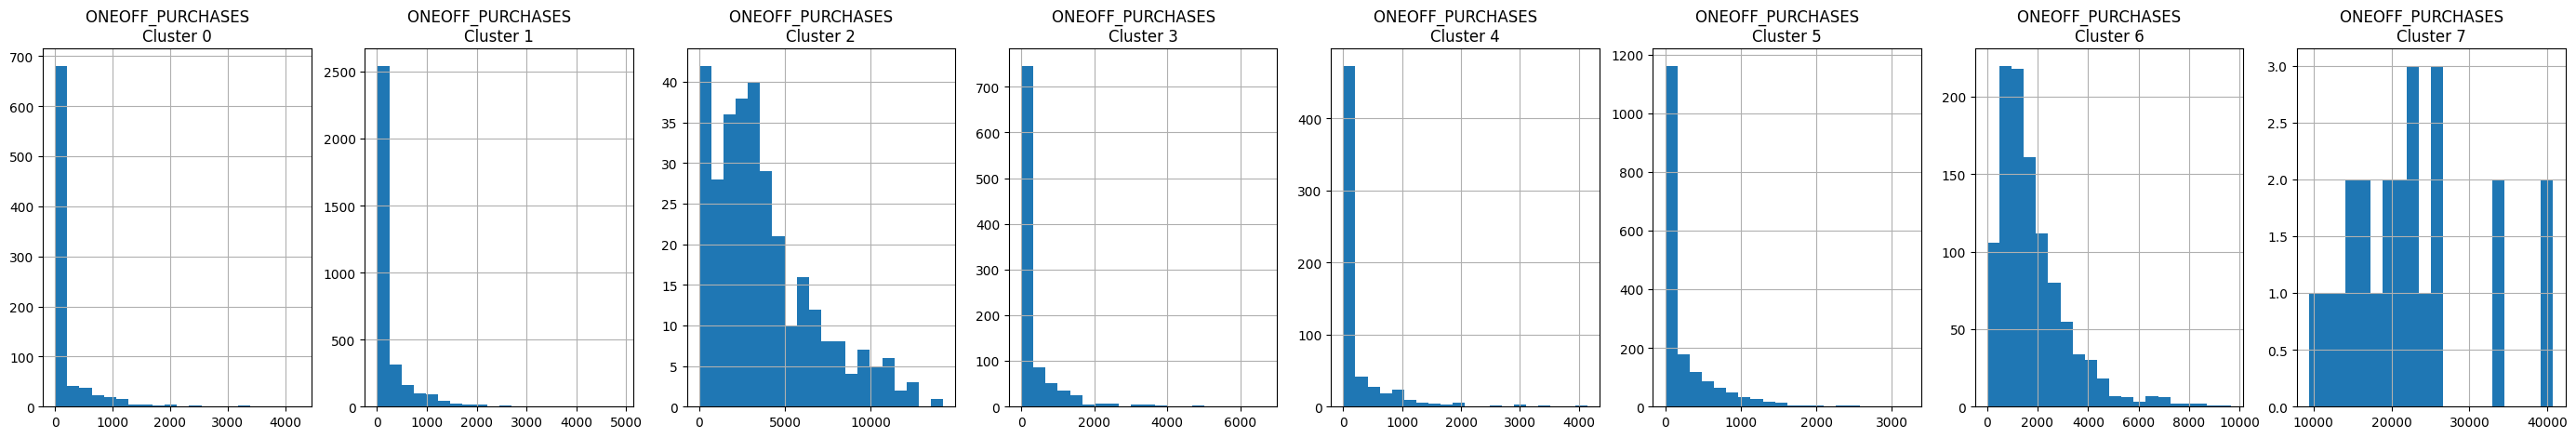

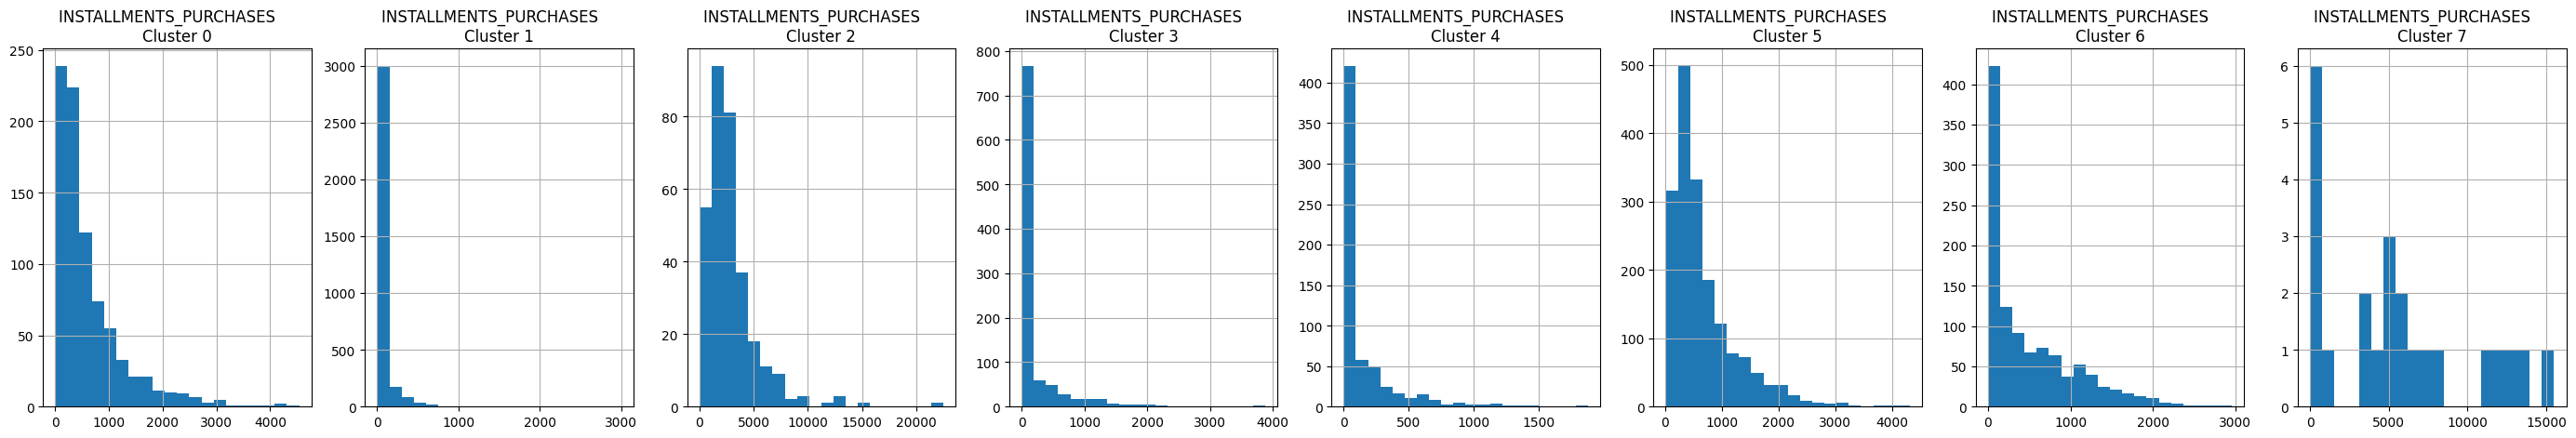

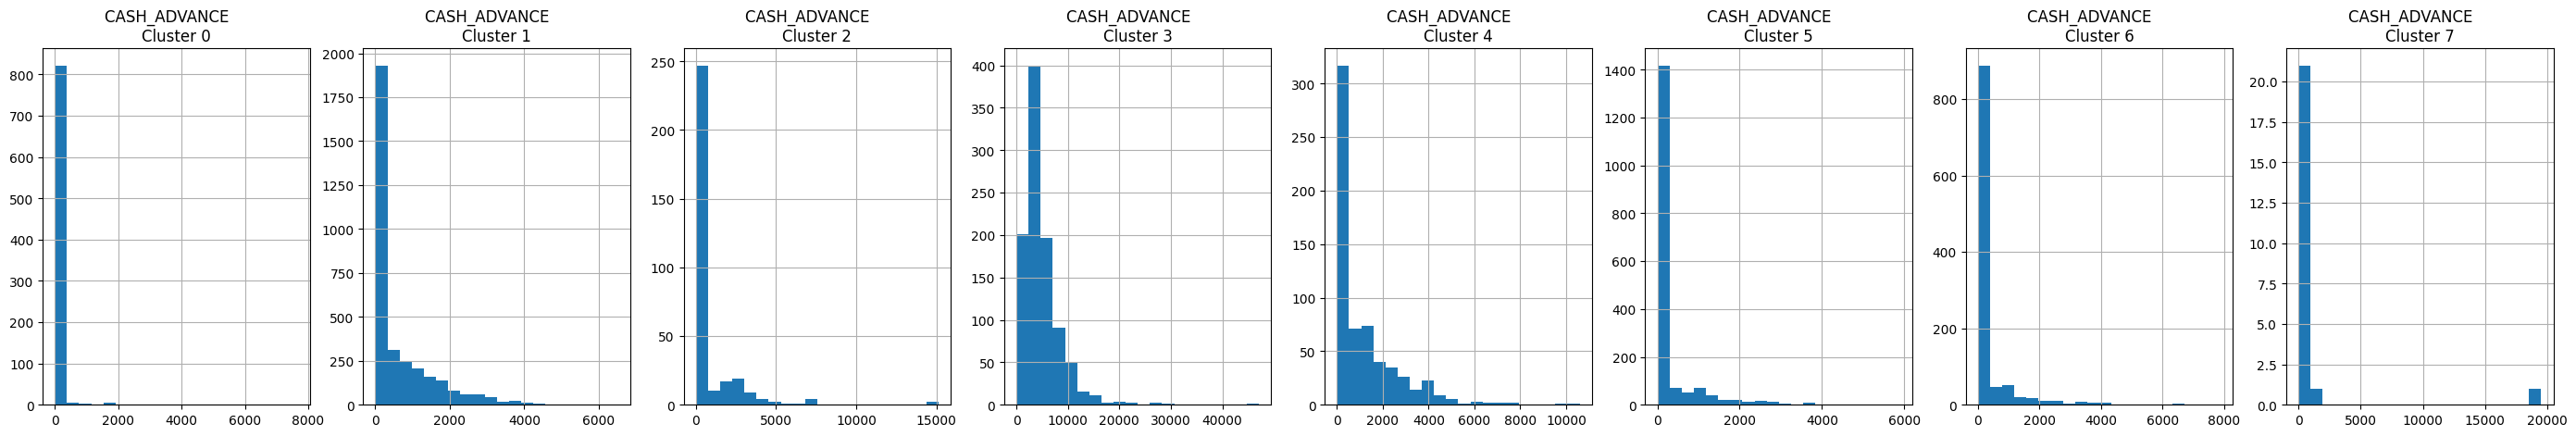

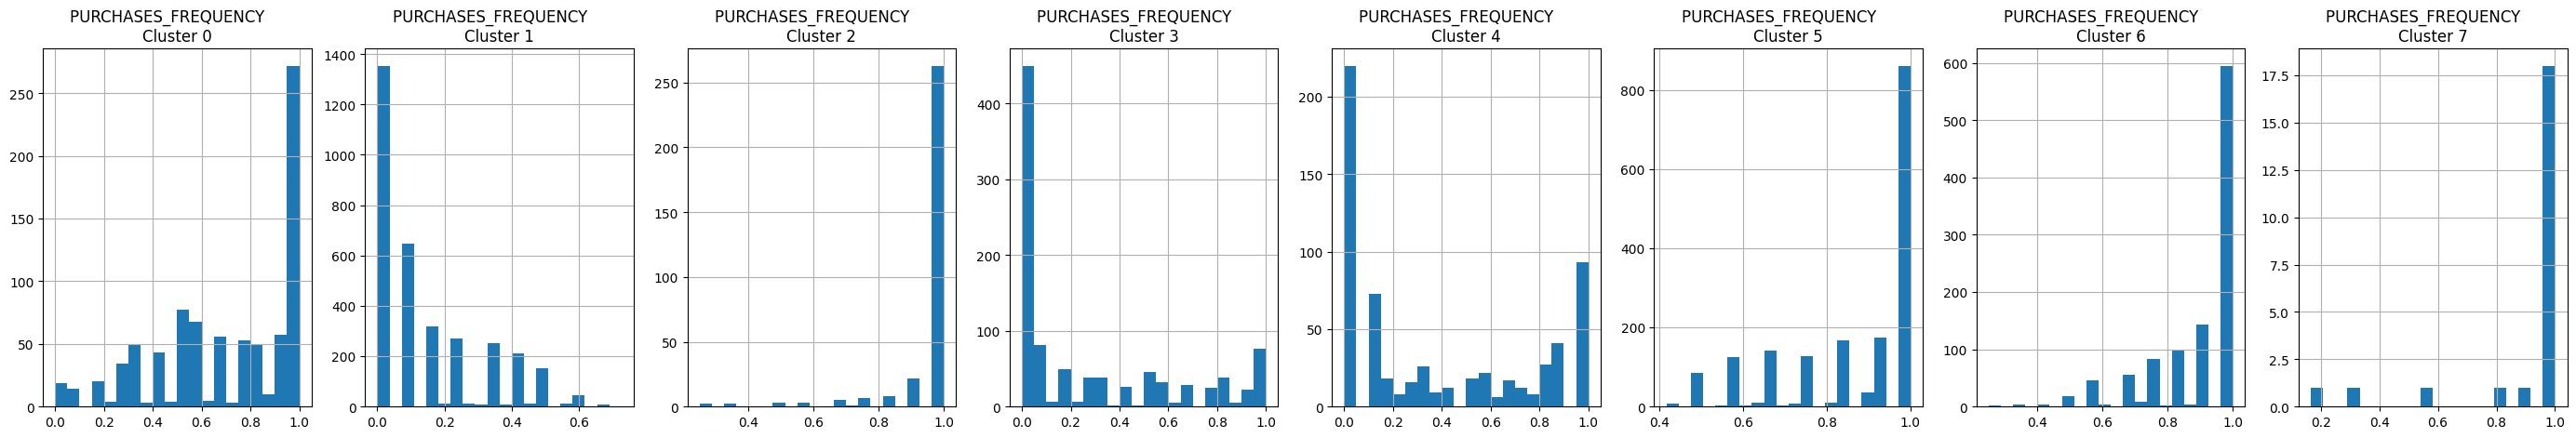

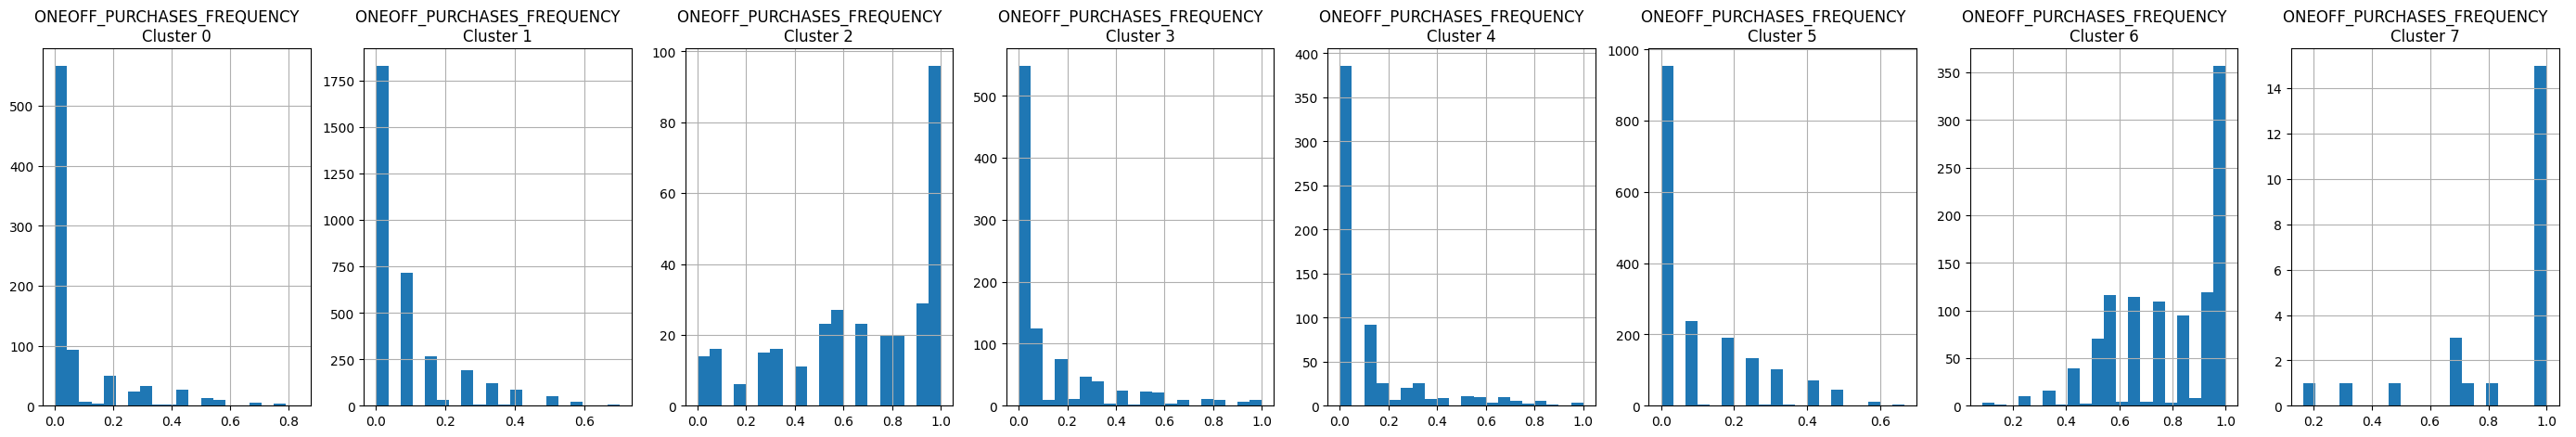

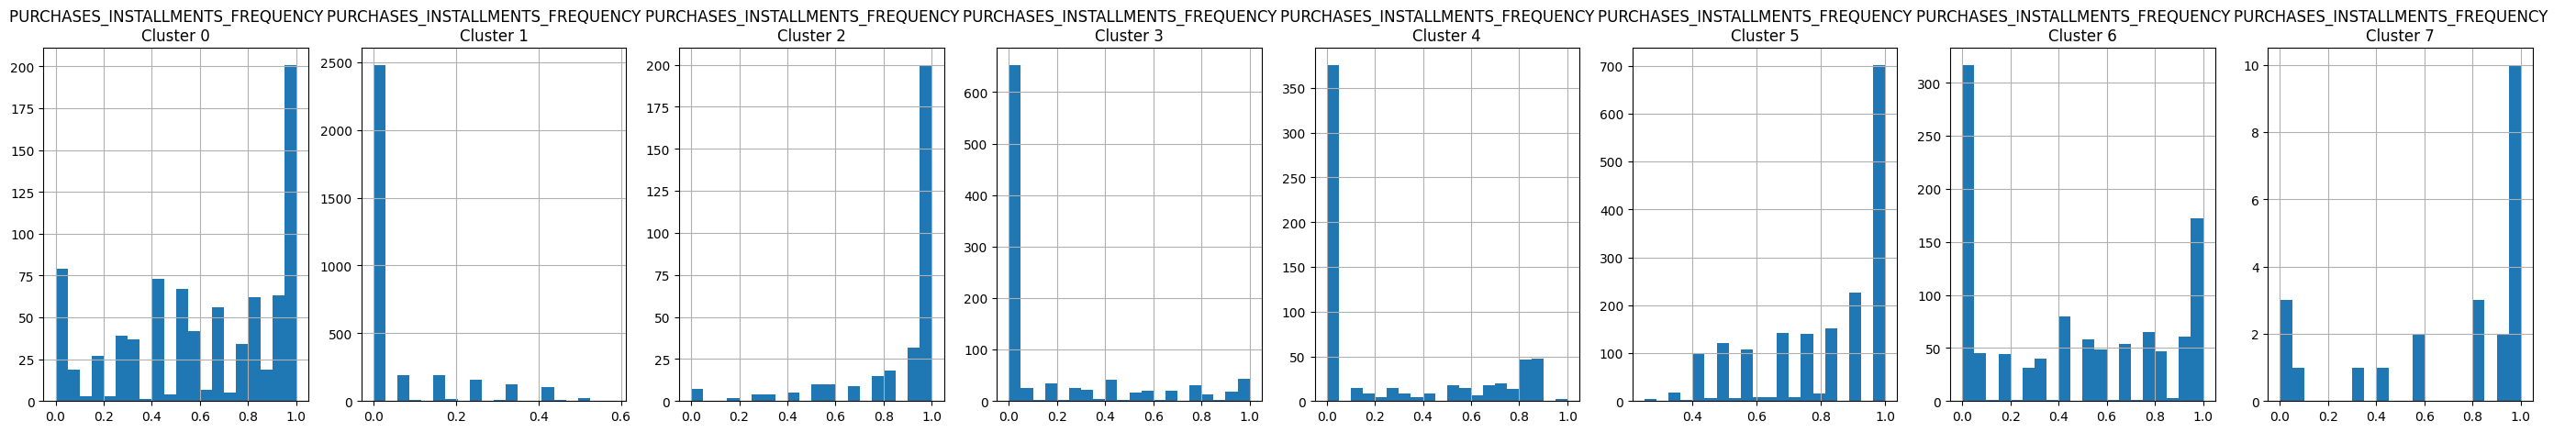

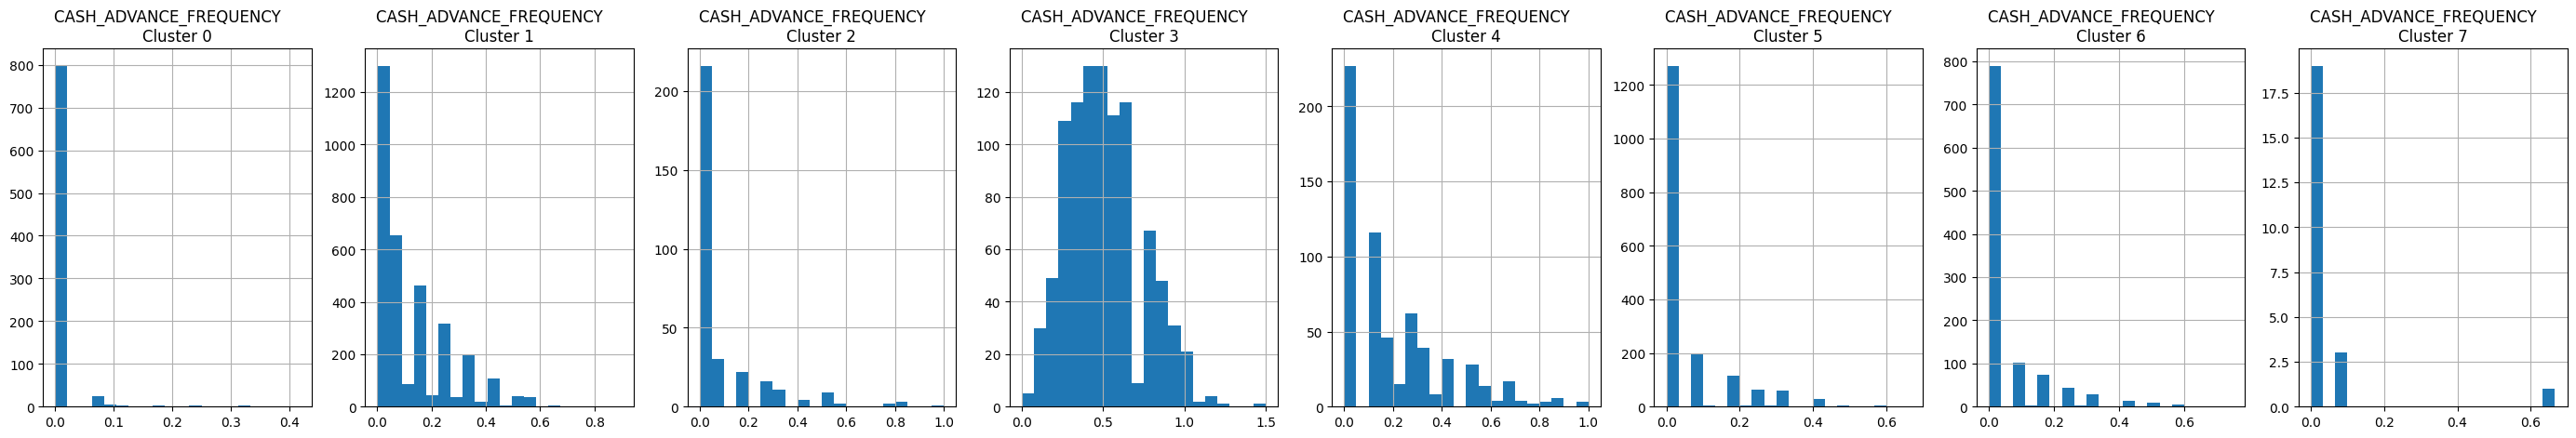

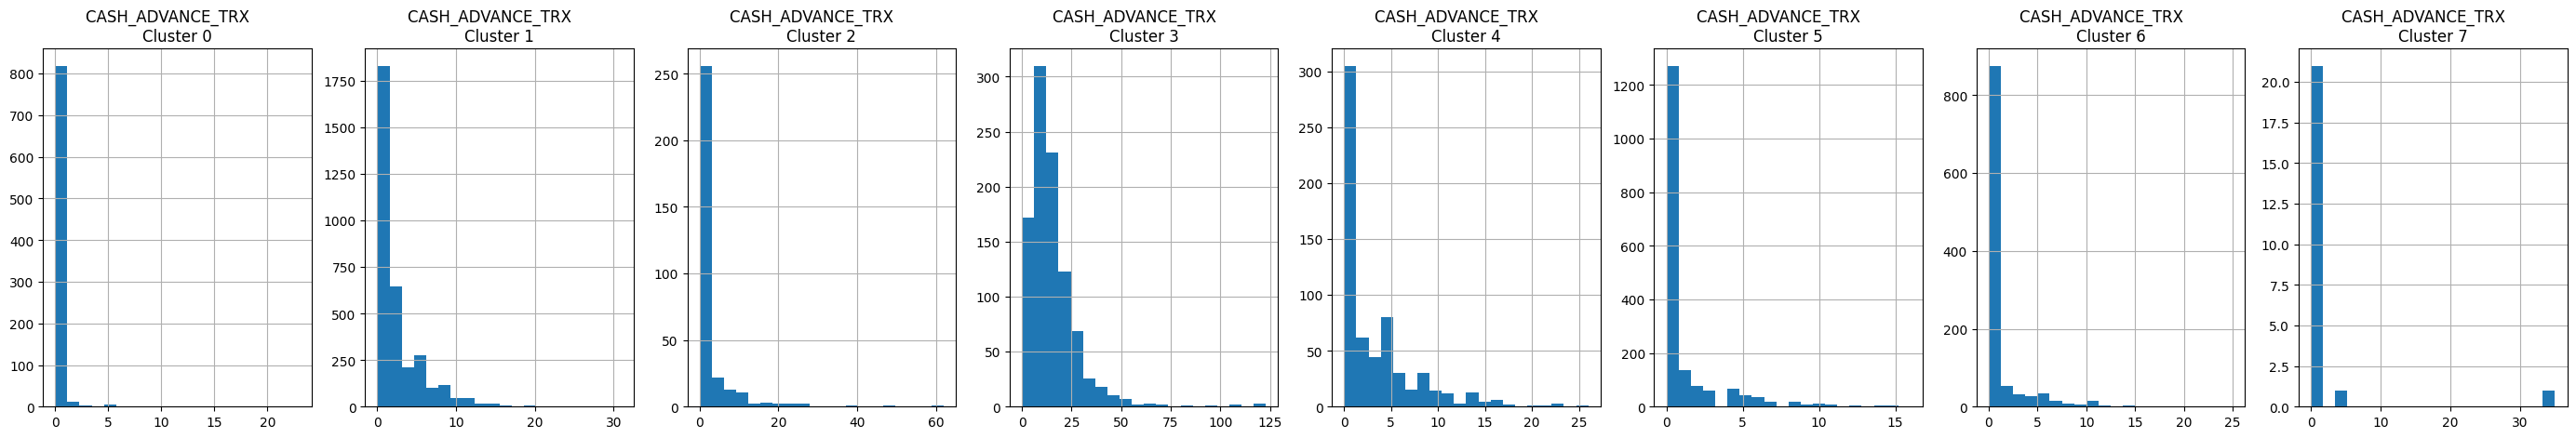

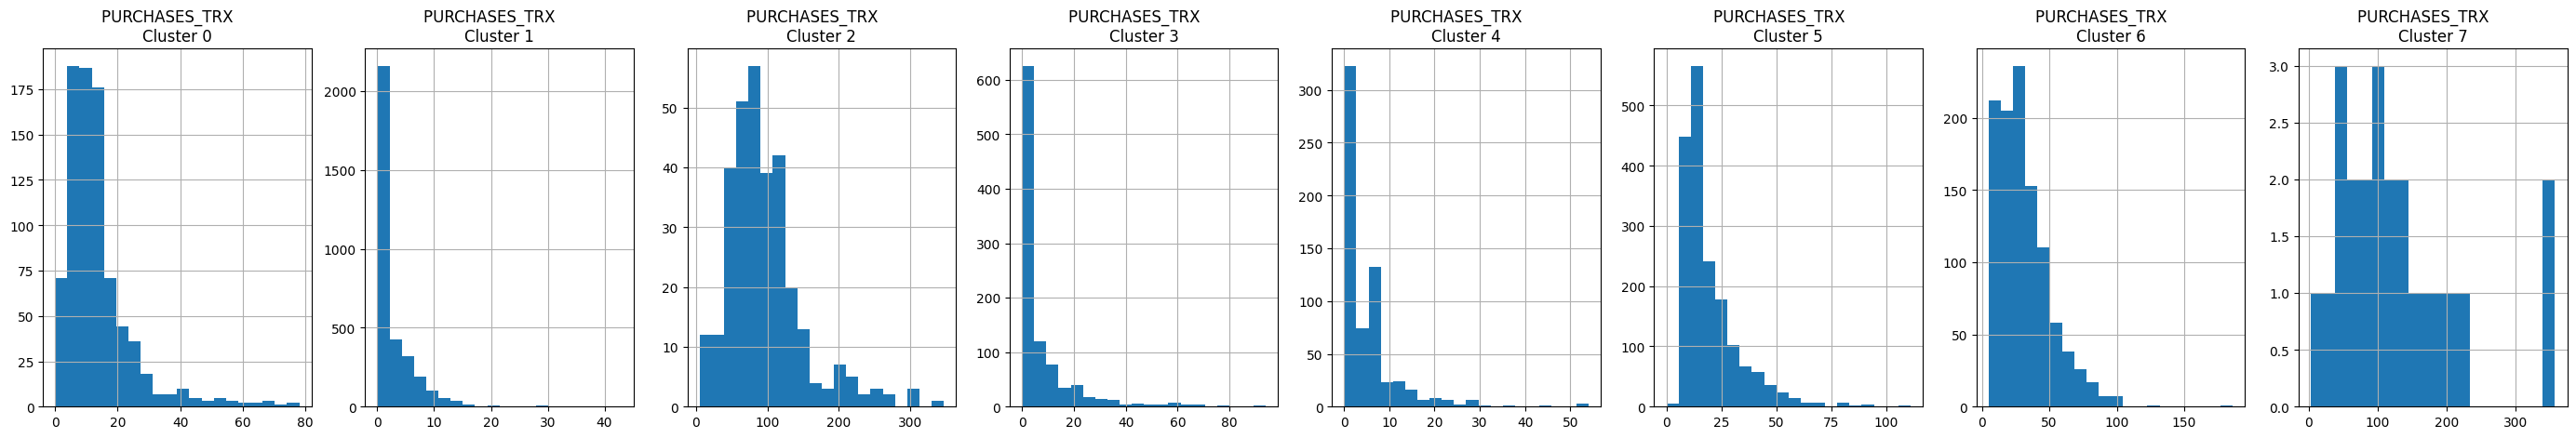

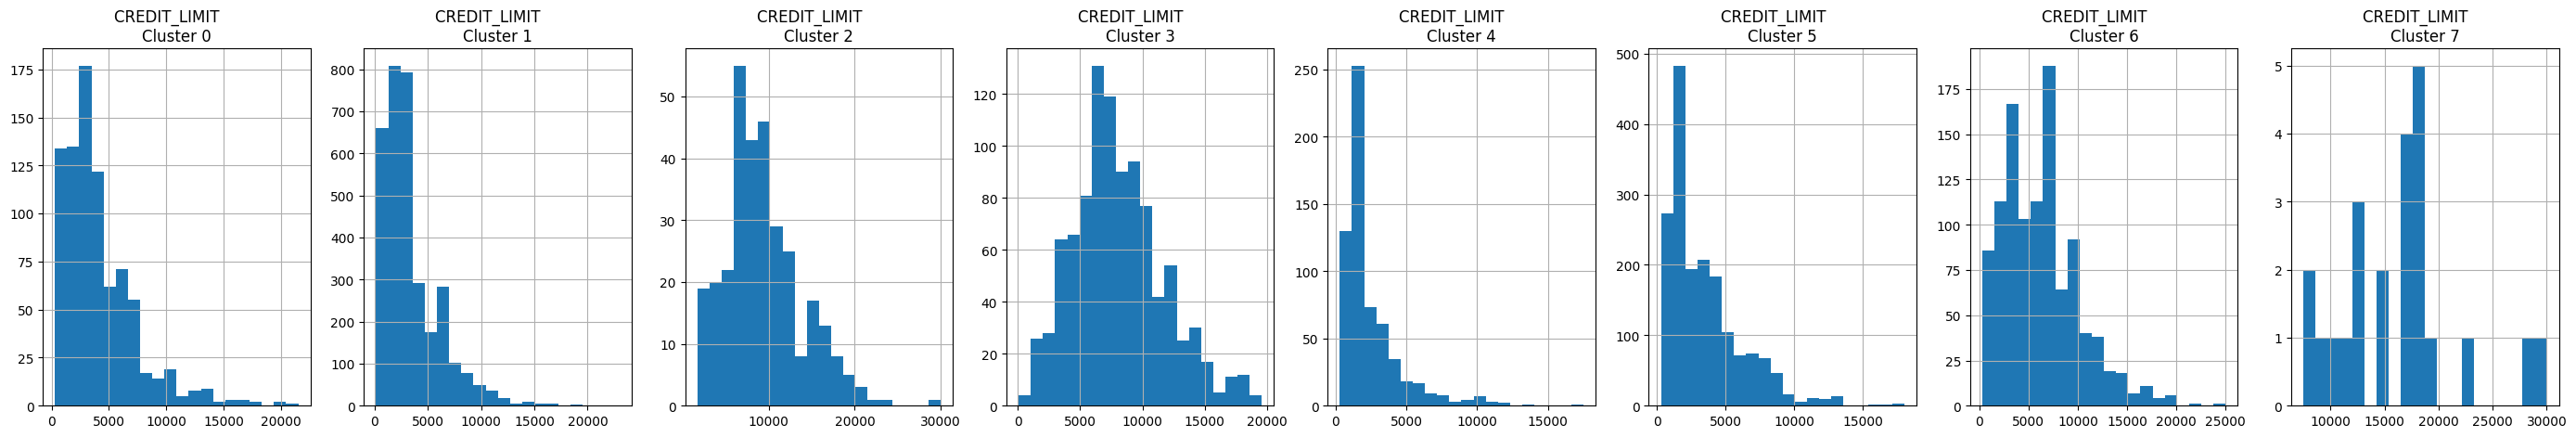

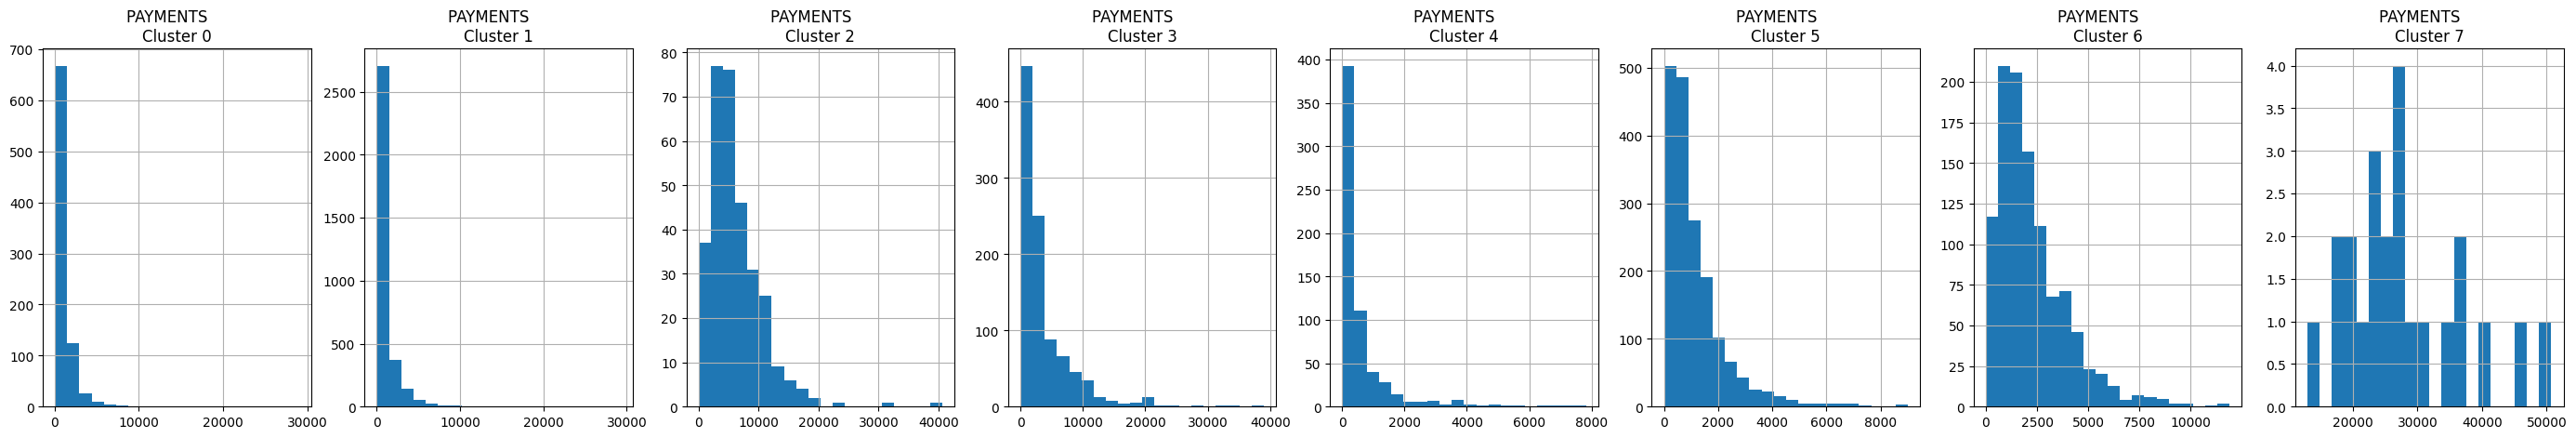

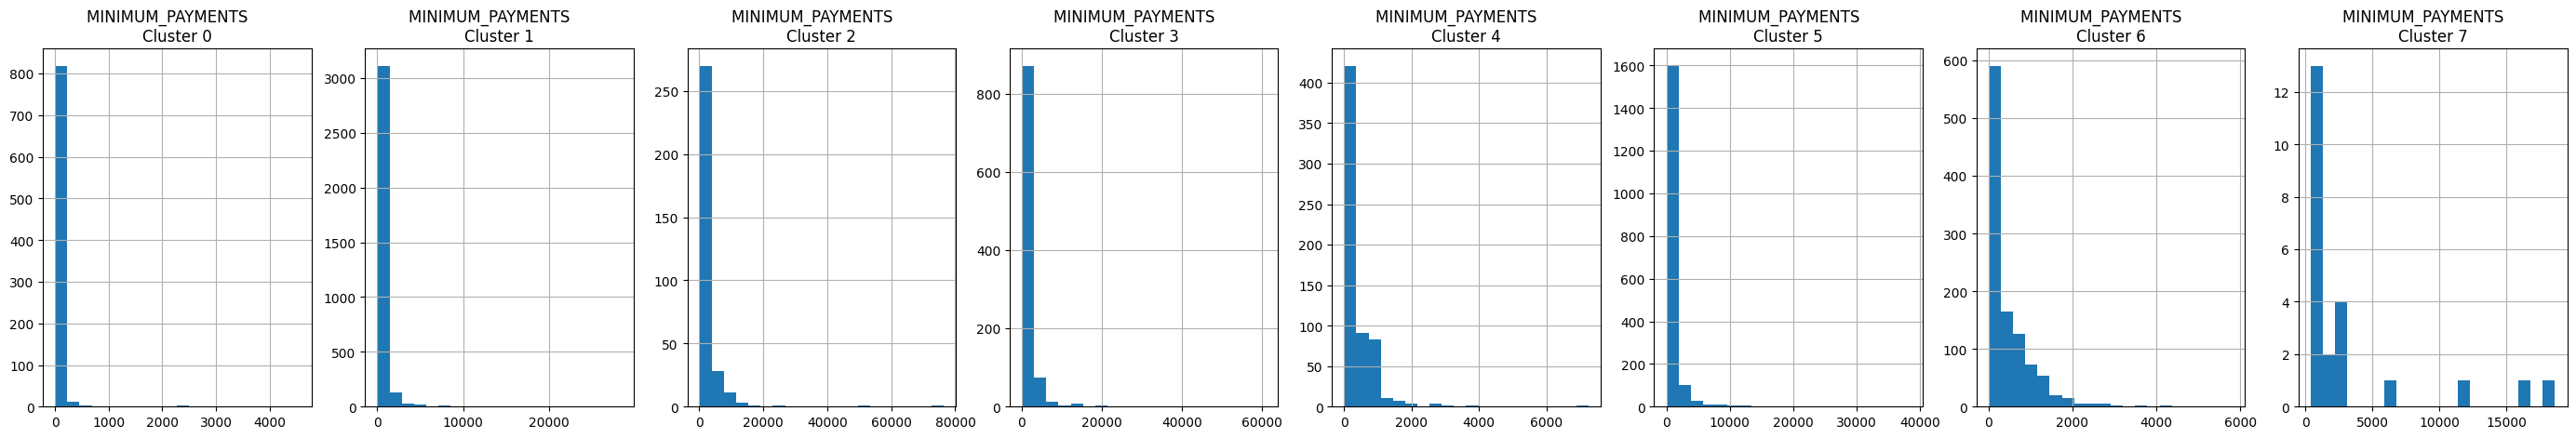

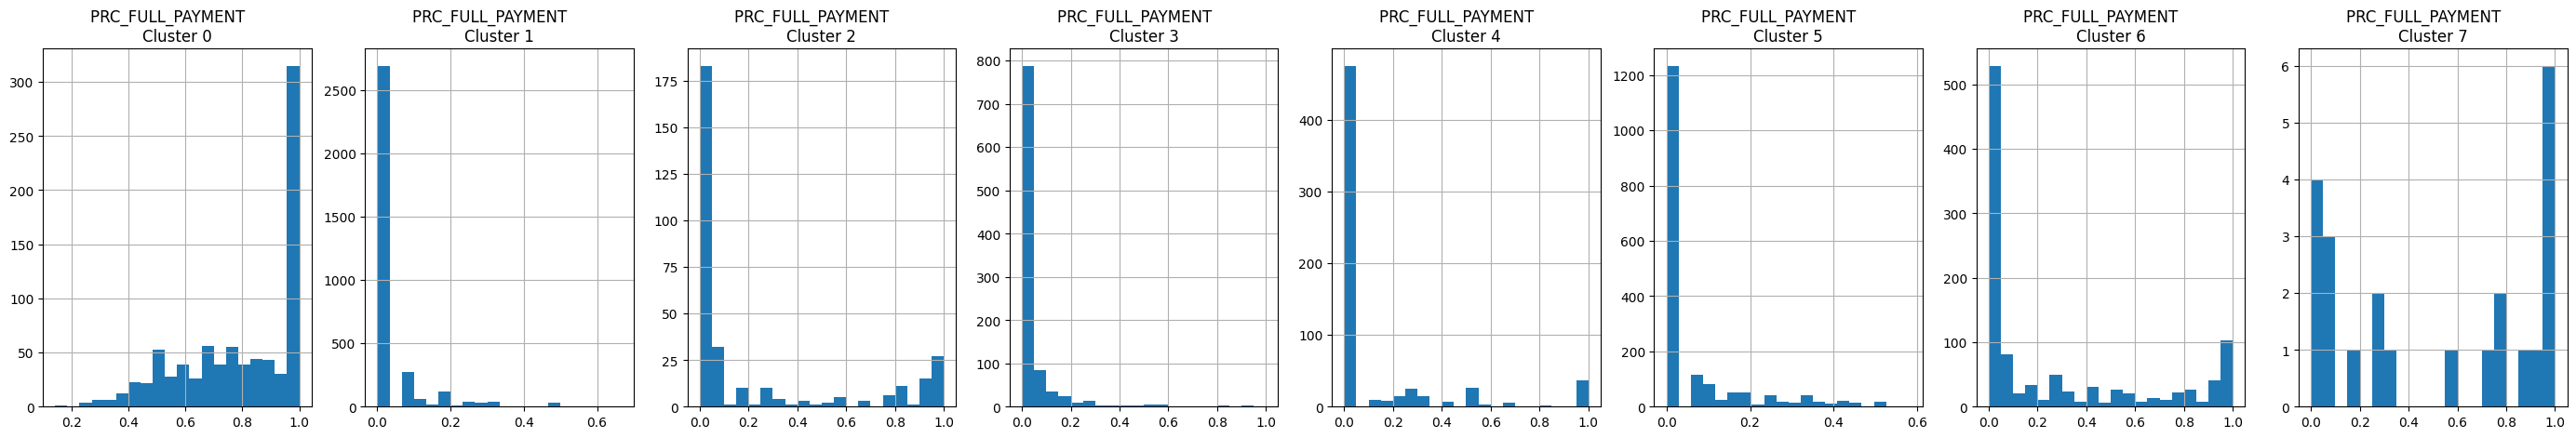

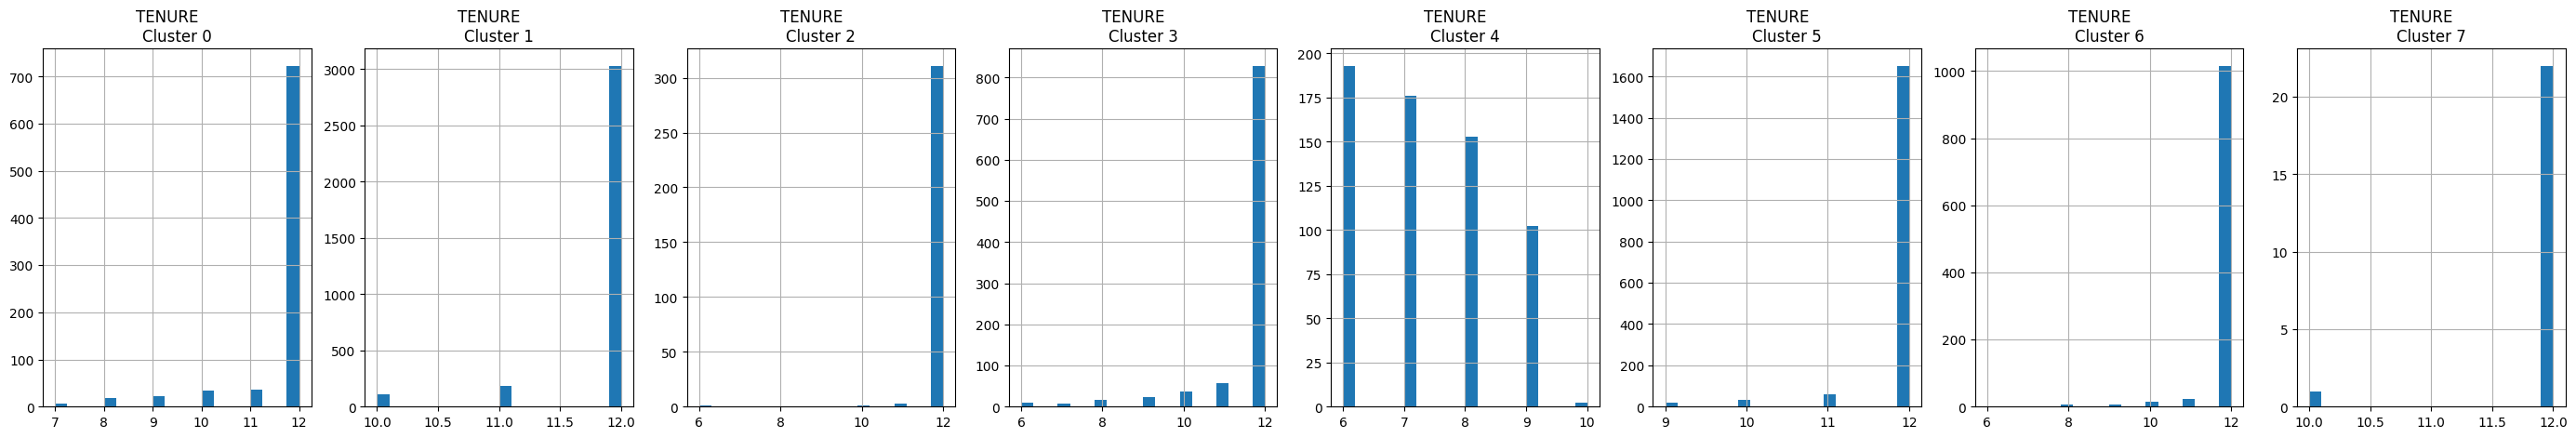

In [ ]:
#plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins= 20)
    plt.title('{}    \nCluster {}' .format(i,j))

plt.show()

Interpretation and purpose (summary)
- the histograms show how each variable is distributed within each cluster, helping to identify patterns. For instance, cluster 0 may represent clients higher balances compared to cluster 1

Purpose:
- Understanding cluster profiles: identify customer segments, such as high-balance, frequent shoppers, versus low balance, infrequent users

- Validating clustering: check if the clusters represent distinct and interpretable groups based on variable distributions

#APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

- PCA is an unsupervised machine learning algorithm,
#** performs dimensionality reductions while attempting at keeping the original information unchanged.**
- Works by trying to find a new set of features called components
- Components are composites of the uncorrelated given input features

In [ ]:
#obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp


array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [ ]:
#Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df['cluster'] = creditcard_df_cluster['cluster']
pca_df.head()


,pca1,pca2,cluster
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,3
2,0.969684,-0.383520,6
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1


the data was reduced from its original dimensionality (several features) to just two dimensions, while retaining most of the variance(information) in the data
This transformation facilitates data visualization and can improve efficiency in machine learning models

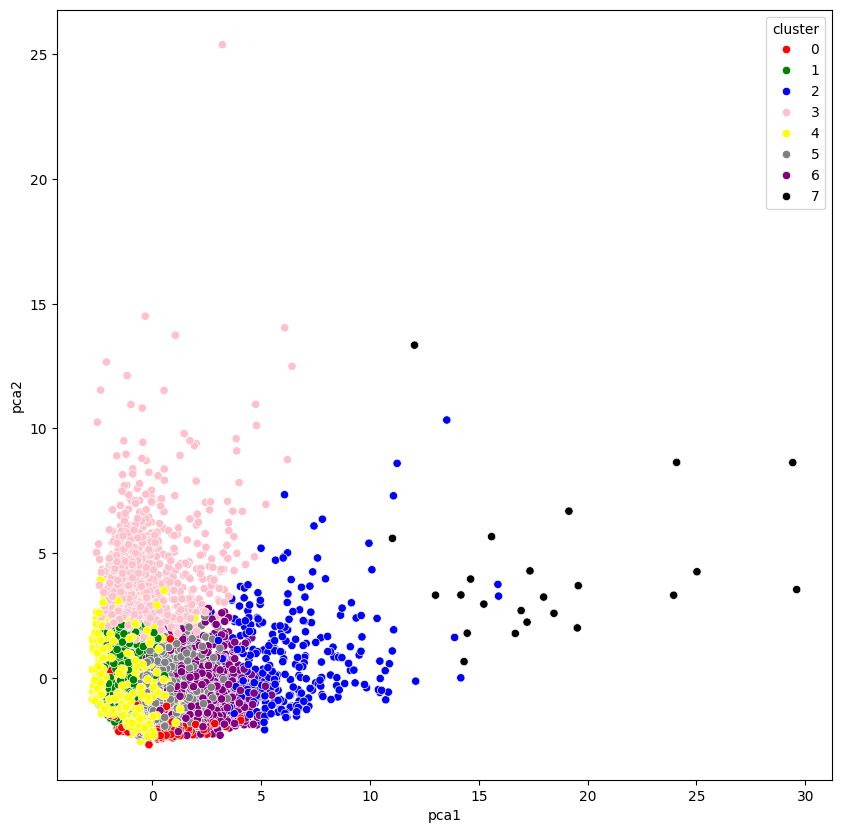

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

- Some clusters, such as cluster 6(purple), appear to be well-concentrated, indicating greater internal similarity among the points.
- Other clusters, such as cluster 4 (yelllow) and cluster 7(black) are more dispersed, suggesting greated variability among the points.
- The overlap between ckusters, such as cluster 6(purple) and cluster 2(green), may indicate proximity or possible ambiguities in the segmentation

#AUTOENCODERS
- Auto encoders use the same input data for the input and output
- Auto encoders work by adding a bottleneck in the network, this bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data.

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [ ]:
encoding_dim = 7

input_df = Input(shape = (17,))

#glorot normal initializer
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded= Dense (17, kernel_initializer = 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

This code defines an autoencoder neural network to learn a compressed representation of your credit card customer data. The encoder part of this network, which reduces the data to 10 dimensions, can be used for dimensionality reduction. The autoencoder is trained to reconstruct the original data from this compressed representation, ensurign that the essential information is preserved

In [ ]:
creditcard_df_scaled.shape


(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.6593
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.3521
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.2632
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2327
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.1929
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1782
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1641
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.1608
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.1573
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.1484
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.1242
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.1205
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.1082
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1056
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.1066
Epo

In [ ]:
autoencoder.save_weights('autoencoder.weights.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
pred.shape

(8950, 10)

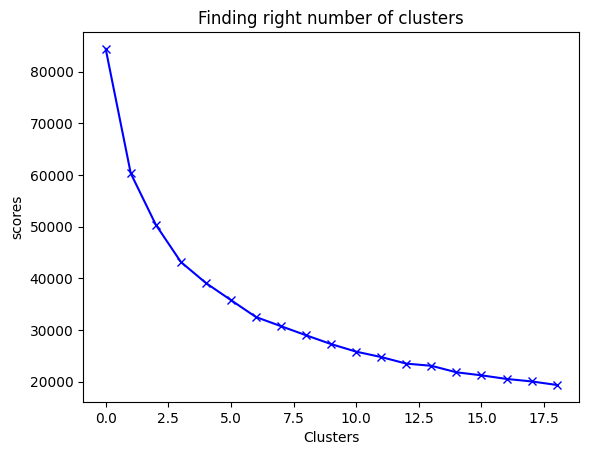

In [ ]:
scores_2 = []

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-47-4539e21b7bfb>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-47-4539e21b7bfb>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


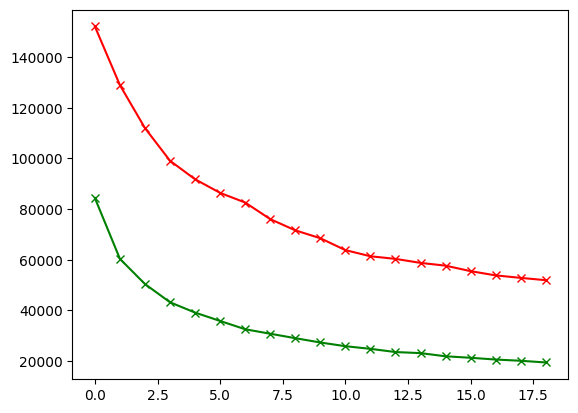

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')



In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

this code section first clusters the data in a reduced dimensionality using pred and then clusters the original scaled data. The cluster assignments for both processes are stored separately in labels and y_kmeans. The redundancy of applying KMEANS twice may be unintentional  

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()
#concat cluster results in the dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.987741,0.054056
1,0.677087,-1.964786
2,0.747136,0.352595
3,-0.580658,0.372511
4,-1.717592,-0.076340


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.987741,0.054056,1
1,0.677087,-1.964786,2
2,0.747136,0.352595,1
3,-0.580658,0.372511,1
4,-1.717592,-0.076340,1


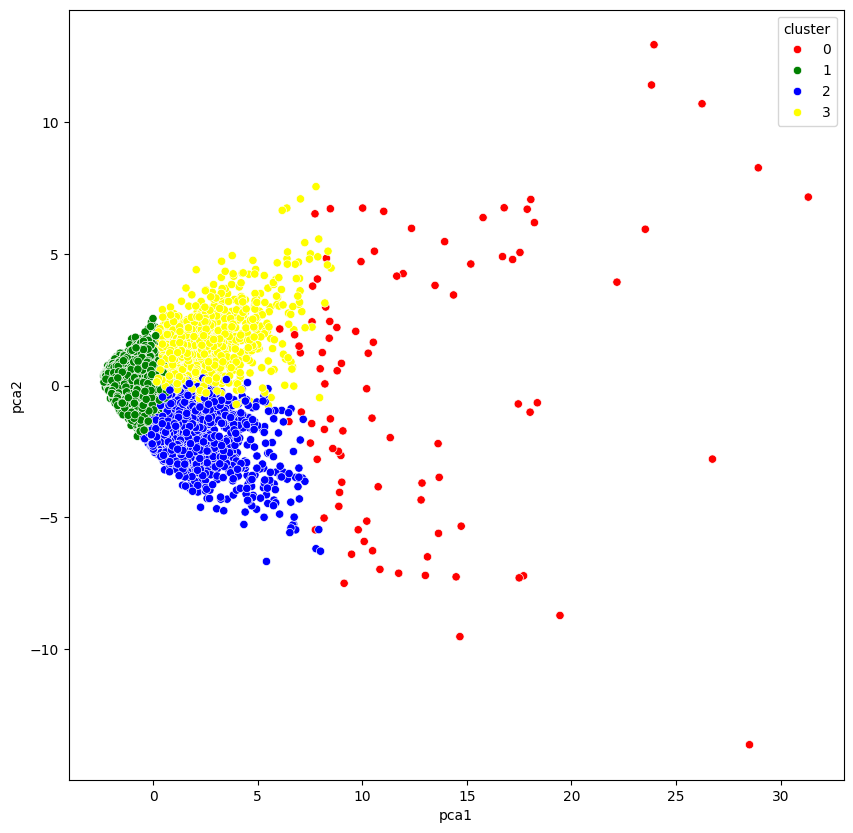

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x= 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow'])
plt.show()

#Cluster mapping:
- Cluster 0 (Transactors):
 - Description: conservative customers with low balance ($104), low cash advance ($303), and a moderate full payment percentage (23%)
 - Behavior on the plot: This cluster is dispersed but tends to be further away from clusters representing higher spending or credit usage

- Cluster 1 (Revolvers):
  - Description: Customers who use credit cards as loans, with high balance and cash advance (~5000), low full payment percentage (3%), and riskier financial behavior
  - Behavior on the plot: These points are closes together due to similar high financial activity

- Cluster 2 (Blue- VIP/PRIME)
  - Description: Stable customers with a high credit limit (16k), a higher full payment percentage, and potencial for increased spending.

  - Behavior on the plot: Likely a well-defined and dense group, indicating financial stability

- Cluster 3 (yellow - low ternure)

  - Newer or less engaged customers with lower balance and cash advance, and shorter tenure (7 years)
  - These points tend to form a distinct cluster, separated from other more established groups